In [1]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import numpy as np

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
import pandas as pd

train = pd.read_csv("train_df_errno.csv")
test = pd.read_csv("test_df.csv")
sub = pd.read_csv("sample_submission.csv")
age = pd.read_csv("age_gender_info.csv")

train.shape, test.shape, sub.shape, age.shape

((2896, 15), (1008, 14), (150, 2), (16, 23))

In [4]:
# train.info()

## 임대보증금 이상치 처리!

In [5]:
grouped = train.groupby(['임대보증금'])
group1 = grouped.get_group( ('-')  ) # 귀엽당 ㅋㅋㅋㅋㅋ
a=group1.index
for x in a:
    train.loc[x,'임대보증금']=0

grouped1 = train.groupby(['임대료'])
group2 = grouped1.get_group( ('-')  ) #흠.....
a=group2.index
for x in a:
    train.loc[x,'임대료']=0

In [6]:
grouped = test.groupby(['임대보증금'])
group1 = grouped.get_group( ('-')  ) #임대보증금& 임대료 안에 이상한 값 '-' 가 들어있다! 
a=group1.index
for x in a:
    test.loc[x,'임대보증금']=0

grouped1 = test.groupby(['임대료'])
group2 = grouped1.get_group( ('-')  )
a=group2.index
for x in a:
    test.loc[x,'임대료']=0 

## 위코드를 절대 두번 돌리지 말기!

## all_df전에 하는 이유는 all_df는 동일 인덱스가 2개있는 오류 발생!

In [7]:
# test.isnull().sum()

In [8]:
test.loc[ 196, "자격유형"] = 'A'
test.loc[ 258, "자격유형"] = 'C'
test['10분내지하철수']=test['10분내지하철수'].fillna(0) #all_df전에 하는 이유는 all_df는 동일 인덱스가 2개있는 오류 발생!
test['10분내지하철수'].value_counts()

0.0    909
1.0     64
2.0     35
Name: 10분내지하철수, dtype: int64

In [9]:
# test.isnull().sum()

In [10]:
# train.isnull().sum()

In [11]:
train['10분내지하철수']=train['10분내지하철수'].fillna(0)
train['10분내버스정류장수']=train['10분내버스정류장수'].fillna(2)
train['10분내지하철수'].value_counts()

0.0    2457
1.0     400
2.0      33
3.0       6
Name: 10분내지하철수, dtype: int64

In [12]:
# train.isnull().sum()

In [13]:
# 전용 면적 피처를 5의 배수로 전처리

train["전용면적5"] = train["전용면적"] // 5*5
test["전용면적5"] = test["전용면적"] // 5*5

## 이전 코드에서는 분명 전용면적/5가 효과가 있었는데 이번에는 효과가 별로 인거 같다!

(array([ 12.,   6.,  85., 180., 352., 314., 649., 781., 399., 118.]),
 array([2.56494936, 3.09283929, 3.62072921, 4.14861914, 4.67650907,
        5.204399  , 5.73228893, 6.26017885, 6.78806878, 7.31595871,
        7.84384864]),
 <BarContainer object of 10 artists>)

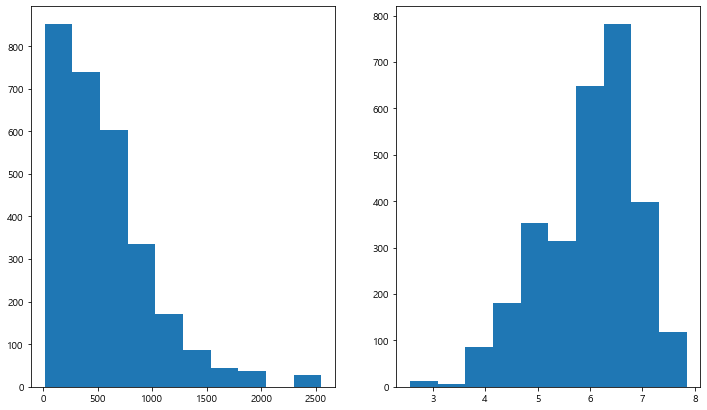

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,7))

ax1.hist(train['등록차량수'])
ax2.hist(np.log(train['등록차량수']))

In [15]:
all_df = pd.concat([train, test], join='inner') #join ineer 는 공통부분만 연결
all_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,전용면적5
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,30.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,35.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0,35.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0,45.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0,45.0
5,C2515,545,아파트,경상남도,국민임대,51.97,106,17.0,A,23042000,190090,0.0,3.0,624.0,50.0
6,C2515,545,아파트,경상남도,국민임대,51.97,26,17.0,A,23042000,190090,0.0,3.0,624.0,50.0
7,C1407,1216,아파트,대전광역시,국민임대,30.95,288,13.0,A,15620000,127350,1.0,1.0,1285.0,30.0
8,C1407,1216,아파트,대전광역시,국민임대,30.99,68,13.0,A,15620000,127350,1.0,1.0,1285.0,30.0
9,C1407,1216,아파트,대전광역시,국민임대,30.99,34,13.0,A,15620000,127350,1.0,1.0,1285.0,30.0


In [16]:
all_df.isnull().sum() #결측치 확인

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금         749
임대료           749
10분내지하철수        0
10분내버스정류장수      0
단지내주차면수         0
전용면적5           0
dtype: int64

In [17]:
all_df['전용면적5'].unique()

array([ 30.,  35.,  45.,  50.,  40.,  55.,  25.,  70.,  10.,  15.,  20.,
       315.,  60., 135.,  75., 105., 580., 125., 240., 400., 245., 405.,
        80.,  65.,   5., 250.])

In [18]:
mapping = { 'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 
            'F':6, 'G':7, 'H':8, 'I':9, 'J':10, 
            'K':11, 'L':12, 'M':13, 'N':14, 'O':15  }

all_df['자격유형'] =all_df['자격유형'].map(mapping).astype(int)

In [19]:
all_df.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,전용면적5
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,1,9216000,82940,0.0,3.0,624.0,30.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,1,12672000,107130,0.0,3.0,624.0,35.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,1,12672000,107130,0.0,3.0,624.0,35.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,1,18433000,149760,0.0,3.0,624.0,45.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,1,18433000,149760,0.0,3.0,624.0,45.0


In [20]:
all_df.corr()['10분내버스정류장수'] #넌 왜 하는거냐??

총세대수         -0.002747
전용면적          0.001667
전용면적별세대수      0.040444
공가수           0.038828
자격유형         -0.014007
10분내지하철수      0.058180
10분내버스정류장수    1.000000
단지내주차면수       0.096833
전용면적5         0.001953
Name: 10분내버스정류장수, dtype: float64

In [21]:
# grouped = train.groupby(['임대건물구분', '지역'])
# group1 = grouped.get_group( ('아파트', '경상남도')  )

In [22]:
all_df['임대보증금']=all_df['임대보증금'].fillna(0) #일단 전처리보다 머신러닝의 능력을 확인하기 위해서 일단 결측치 다 0!
all_df['임대료']=all_df['임대료'].fillna(0)


In [23]:
# all_df['임대보증금'].value_counts()

In [24]:
# all_df['임대료'].value_counts()

In [25]:
all_df['임대보증금'] = all_df['임대보증금'].astype('float32') #뒤에서 상관관계 보기 위해서 type 바꿔주기!
all_df['임대료'] = all_df['임대료'].astype('float32')

In [26]:
all_df.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금         0
임대료           0
10분내지하철수      0
10분내버스정류장수    0
단지내주차면수       0
전용면적5         0
dtype: int64

In [27]:
gubun1 = {'아파트':1, '상가':2}
gubun2 = {'경상남도':1, '대전광역시':2, '경기도':3, '전라북도':4, 
          '강원도':5, '광주광역시':6, '충청남도':7, '부산광역시':8, 
          '제주특별자치도':9, '울산광역시':10, '충청북도':11, '전라남도':12, 
          '경상북도':13, '대구광역시':14, '서울특별시':15, '세종특별자치시':16}

gubun3 = {'국민임대':1, '공공임대(50년)':2, '영구임대':3, '임대상가':4, 
          '공공임대(10년)':5, '공공임대(분납)':6, '장기전세':7, '공공분양':8, 
          '행복주택':9, '공공임대(5년)':10}

all_df['임대건물구분_lbl'] = all_df['임대건물구분'].map(gubun1)
all_df['지역_lbl'] = all_df['지역'].map(gubun2)
all_df['공급유형_lbl'] = all_df['공급유형'].map(gubun3)

all_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,전용면적5,임대건물구분_lbl,지역_lbl,공급유형_lbl
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,1,9216000.0,82940.0,0.0,3.0,624.0,30.0,1,1,1
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,1,12672000.0,107130.0,0.0,3.0,624.0,35.0,1,1,1
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,1,12672000.0,107130.0,0.0,3.0,624.0,35.0,1,1,1
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,1,18433000.0,149760.0,0.0,3.0,624.0,45.0,1,1,1
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,1,18433000.0,149760.0,0.0,3.0,624.0,45.0,1,1,1
5,C2515,545,아파트,경상남도,국민임대,51.97,106,17.0,1,23042000.0,190090.0,0.0,3.0,624.0,50.0,1,1,1
6,C2515,545,아파트,경상남도,국민임대,51.97,26,17.0,1,23042000.0,190090.0,0.0,3.0,624.0,50.0,1,1,1
7,C1407,1216,아파트,대전광역시,국민임대,30.95,288,13.0,1,15620000.0,127350.0,1.0,1.0,1285.0,30.0,1,2,1
8,C1407,1216,아파트,대전광역시,국민임대,30.99,68,13.0,1,15620000.0,127350.0,1.0,1.0,1285.0,30.0,1,2,1
9,C1407,1216,아파트,대전광역시,국민임대,30.99,34,13.0,1,15620000.0,127350.0,1.0,1.0,1285.0,30.0,1,2,1


In [28]:
all_df['단지코드'] = all_df['단지코드'].astype("category")
all_df['단지코드_lbl'] = all_df['단지코드'].cat.codes

### 전용면적을 구간화하기
all_df['전용면적별세대수'] = all_df['전용면적별세대수'].astype('float32')

# 전용면적, 공가수, 단지내주차면수 
all_df['qcut_총세대수'] = pd.qcut(all_df['총세대수'], 5, labels=False) #5구간으로  구간분할!
all_df.head(10)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,전용면적5,임대건물구분_lbl,지역_lbl,공급유형_lbl,단지코드_lbl,qcut_총세대수
0,C2515,545,아파트,경상남도,국민임대,33.48,276.0,17.0,1,9216000.0,82940.0,0.0,3.0,624.0,30.0,1,1,1,492,1
1,C2515,545,아파트,경상남도,국민임대,39.60,60.0,17.0,1,12672000.0,107130.0,0.0,3.0,624.0,35.0,1,1,1,492,1
2,C2515,545,아파트,경상남도,국민임대,39.60,20.0,17.0,1,12672000.0,107130.0,0.0,3.0,624.0,35.0,1,1,1,492,1
3,C2515,545,아파트,경상남도,국민임대,46.90,38.0,17.0,1,18433000.0,149760.0,0.0,3.0,624.0,45.0,1,1,1,492,1
4,C2515,545,아파트,경상남도,국민임대,46.90,19.0,17.0,1,18433000.0,149760.0,0.0,3.0,624.0,45.0,1,1,1,492,1
5,C2515,545,아파트,경상남도,국민임대,51.97,106.0,17.0,1,23042000.0,190090.0,0.0,3.0,624.0,50.0,1,1,1,492,1
6,C2515,545,아파트,경상남도,국민임대,51.97,26.0,17.0,1,23042000.0,190090.0,0.0,3.0,624.0,50.0,1,1,1,492,1
7,C1407,1216,아파트,대전광역시,국민임대,30.95,288.0,13.0,1,15620000.0,127350.0,1.0,1.0,1285.0,30.0,1,2,1,131,3
8,C1407,1216,아파트,대전광역시,국민임대,30.99,68.0,13.0,1,15620000.0,127350.0,1.0,1.0,1285.0,30.0,1,2,1,131,3
9,C1407,1216,아파트,대전광역시,국민임대,30.99,34.0,13.0,1,15620000.0,127350.0,1.0,1.0,1285.0,30.0,1,2,1,131,3


In [29]:
group1 = ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', 
          'C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 
          'C1584', 'C2298', 'C2225', 'C1218', 'C1970', 'C1732', 'C2433', 'C1894', 'C1156', 'C2142', 
          'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', 
          'C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189' ]
group2=['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804']

for one1 in group1:
    all_df.loc[ all_df['단지코드'] == one1, "단지코드_Type" ] = 1
for one2 in group2:
    all_df.loc[ all_df['단지코드'] == one2, "단지코드_Type" ] = 2

In [30]:
all_df['단지코드_Type'].unique()

array([nan,  1.,  2.])

In [31]:
all_df.loc[  all_df['단지코드_Type'].isna(), "단지코드_Type"] = 3
all_df['단지코드_Type'].unique()


array([3., 1., 2.])

In [32]:
all_df_last = all_df.drop(['임대건물구분', '지역', '공급유형'] , axis=1)
all_df_last

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,전용면적5,임대건물구분_lbl,지역_lbl,공급유형_lbl,단지코드_lbl,qcut_총세대수,단지코드_Type
0,C2515,545,33.48,276.0,17.0,1,9216000.0,82940.0,0.0,3.0,624.0,30.0,1,1,1,492,1,3.0
1,C2515,545,39.60,60.0,17.0,1,12672000.0,107130.0,0.0,3.0,624.0,35.0,1,1,1,492,1,3.0
2,C2515,545,39.60,20.0,17.0,1,12672000.0,107130.0,0.0,3.0,624.0,35.0,1,1,1,492,1,3.0
3,C2515,545,46.90,38.0,17.0,1,18433000.0,149760.0,0.0,3.0,624.0,45.0,1,1,1,492,1,3.0
4,C2515,545,46.90,19.0,17.0,1,18433000.0,149760.0,0.0,3.0,624.0,45.0,1,1,1,492,1,3.0
5,C2515,545,51.97,106.0,17.0,1,23042000.0,190090.0,0.0,3.0,624.0,50.0,1,1,1,492,1,3.0
6,C2515,545,51.97,26.0,17.0,1,23042000.0,190090.0,0.0,3.0,624.0,50.0,1,1,1,492,1,3.0
7,C1407,1216,30.95,288.0,13.0,1,15620000.0,127350.0,1.0,1.0,1285.0,30.0,1,2,1,131,3,3.0
8,C1407,1216,30.99,68.0,13.0,1,15620000.0,127350.0,1.0,1.0,1285.0,30.0,1,2,1,131,3,3.0
9,C1407,1216,30.99,34.0,13.0,1,15620000.0,127350.0,1.0,1.0,1285.0,30.0,1,2,1,131,3,3.0


In [33]:
# fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,13)) #그냥 확인용
# ax[0][0].hist(all_df_last['총세대수'])
# ax[0][1].hist(all_df_last['전용면적'])
# ax[1][0].hist(all_df_last['단지내주차면수'])
# ax[1][1].hist(all_df_last['10분내지하철수'])
# ax[2][0].hist(all_df_last['10분내버스정류장수'])
# ax[2][1].hist(all_df_last['전용면적별세대수']) 

In [34]:
train_df = all_df_last.iloc[0:2896,:]
test_df = all_df_last.iloc[2896:,:]

print(train_df.shape, test_df.shape)

train_df = pd.concat([train_df, train['등록차량수'] ], axis=1)
# train_df

(2896, 18) (1008, 18)


In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2896 entries, 0 to 2895
Data columns (total 19 columns):
단지코드          2896 non-null category
총세대수          2896 non-null int64
전용면적          2896 non-null float64
전용면적별세대수      2896 non-null float32
공가수           2896 non-null float64
자격유형          2896 non-null int32
임대보증금         2896 non-null float32
임대료           2896 non-null float32
10분내지하철수      2896 non-null float64
10분내버스정류장수    2896 non-null float64
단지내주차면수       2896 non-null float64
전용면적5         2896 non-null float64
임대건물구분_lbl    2896 non-null int64
지역_lbl        2896 non-null int64
공급유형_lbl      2896 non-null int64
단지코드_lbl      2896 non-null int16
qcut_총세대수     2896 non-null int64
단지코드_Type     2896 non-null float64
등록차량수         2896 non-null float64
dtypes: category(1), float32(3), float64(8), int16(1), int32(1), int64(5)
memory usage: 397.7 KB


In [36]:
train_df['log_등록차량수'] = np.log1p(train_df['등록차량수'])


In [37]:
sel = [ '총세대수', '전용면적', '공가수', '단지내주차면수','임대보증금','임대료',
       'qcut_총세대수', '전용면적별세대수', '10분내버스정류장수',
        '공급유형_lbl', '지역_lbl', '단지코드_lbl', '자격유형','임대건물구분_lbl','10분내지하철수','전용면적5',
       '단지코드_Type','log_등록차량수','등록차량수']

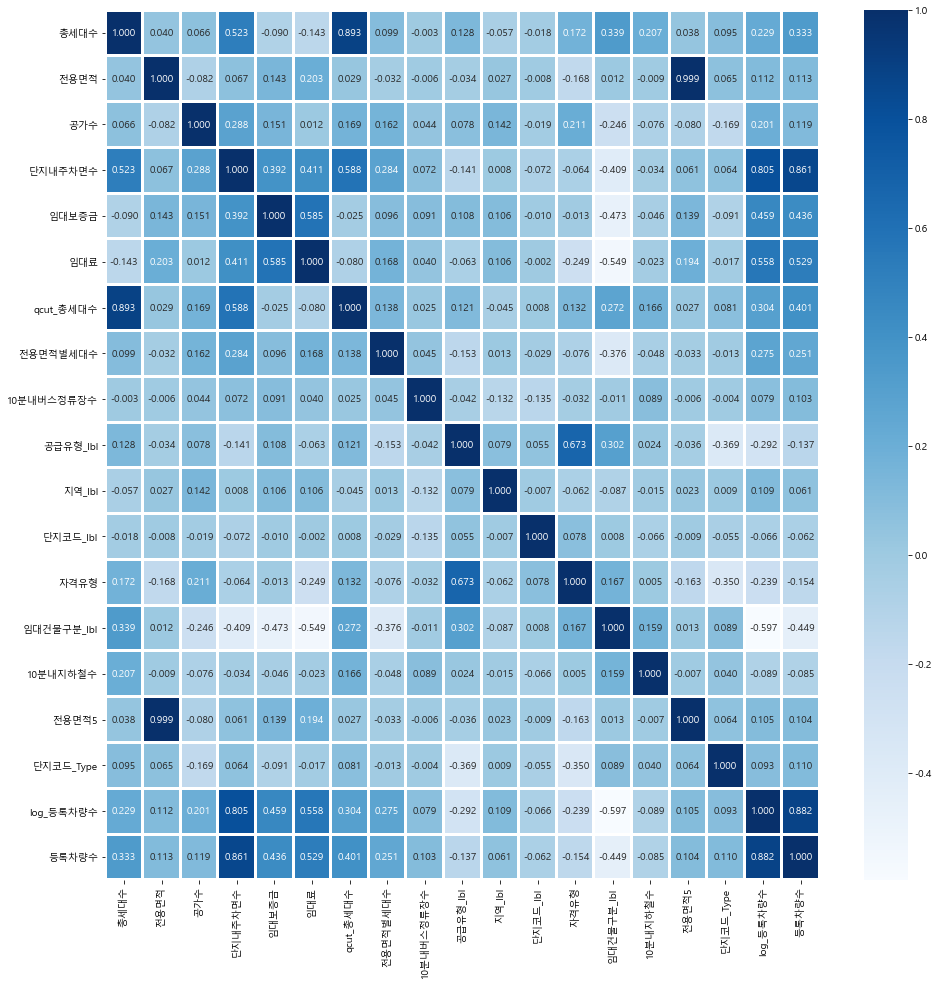

In [38]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
ax = sns.heatmap(train_df[sel].corr(), 
                 cmap="Blues",           # cmap Color
                 annot=True,            # Value Text
                 fmt=".3f",             # Value type (interge = "d")
                 linewidths=2) 

In [39]:
sel = [
        '공급유형_lbl',  '자격유형','임대건물구분_lbl','10분내지하철수','log_등록차량수','등록차량수'
       ]

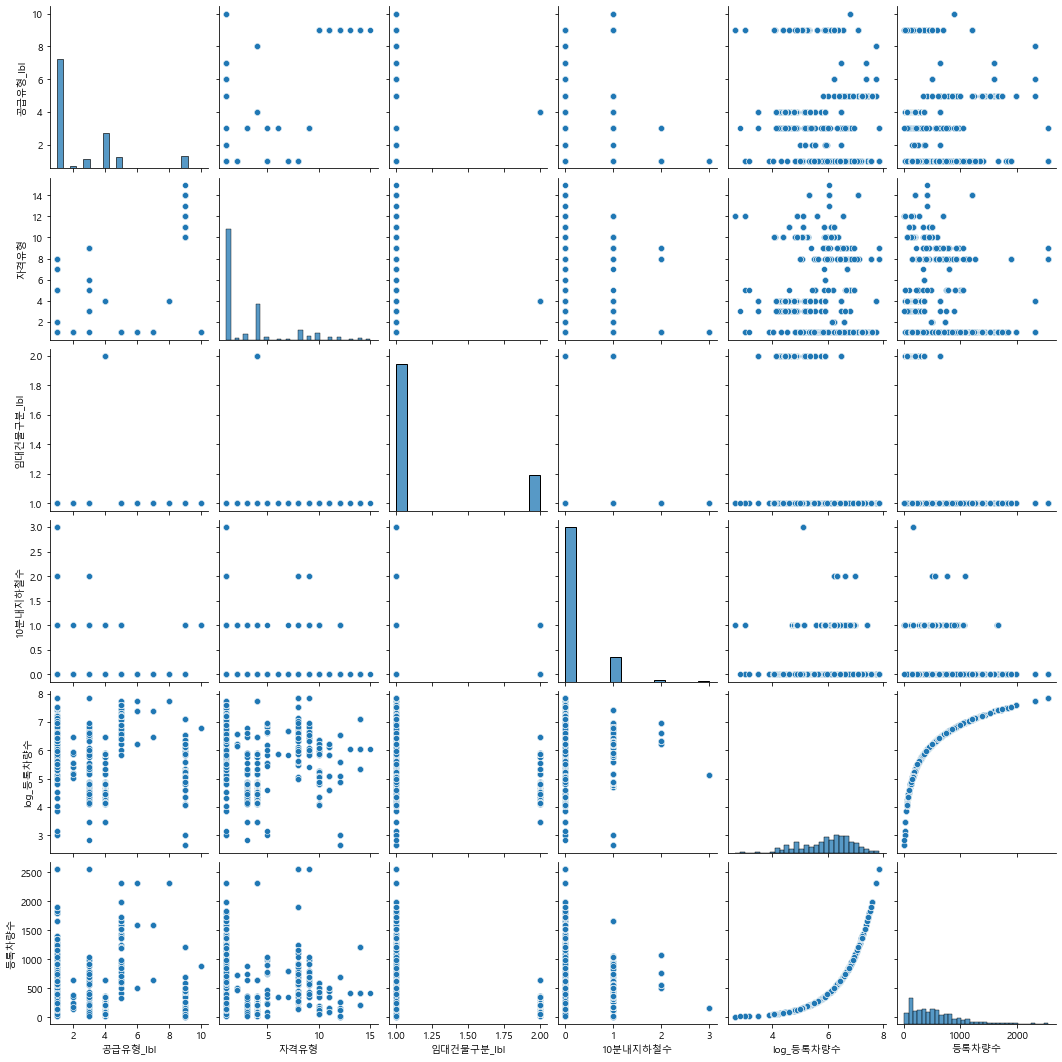

In [40]:
sns.pairplot(train_df[sel])

<AxesSubplot:xlabel='등록차량수', ylabel='Count'>

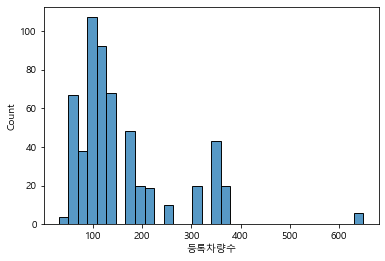

In [41]:
sns.histplot(train_df[train_df["임대건물구분_lbl"] == 2]["등록차량수"])

<AxesSubplot:xlabel='등록차량수', ylabel='Count'>

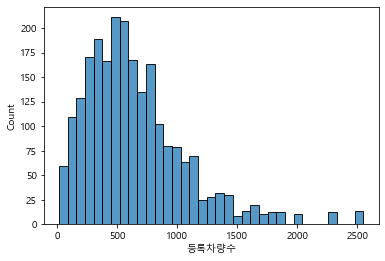

In [42]:
sns.histplot(train_df[train_df["임대건물구분_lbl"] == 1]["등록차량수"])

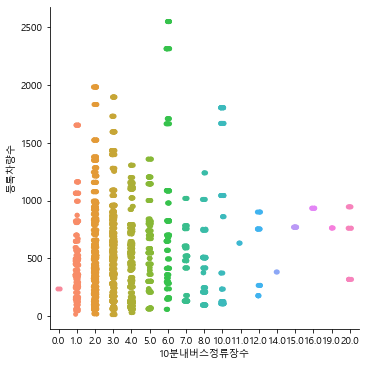

In [43]:

sns.catplot(data=train_df,x='10분내버스정류장수',y='등록차량수')

In [44]:
from sklearn.model_selection import train_test_split

print("등록차량수 상관계수 : ", train_df.corr()['등록차량수'])
print()
print("log_등록차량수 상관계수 ; ", train_df.corr()['log_등록차량수'])

등록차량수 상관계수 :  총세대수          0.333440
전용면적          0.112717
전용면적별세대수      0.250513
공가수           0.118910
자격유형         -0.154482
임대보증금         0.435523
임대료           0.529219
10분내지하철수     -0.085468
10분내버스정류장수    0.102619
단지내주차면수       0.861338
전용면적5         0.104292
임대건물구분_lbl   -0.449130
지역_lbl        0.060674
공급유형_lbl     -0.137277
단지코드_lbl     -0.062077
qcut_총세대수     0.401309
단지코드_Type     0.109893
등록차량수         1.000000
log_등록차량수     0.881679
Name: 등록차량수, dtype: float64

log_등록차량수 상관계수 ;  총세대수          0.228964
전용면적          0.111644
전용면적별세대수      0.274772
공가수           0.200793
자격유형         -0.239157
임대보증금         0.458732
임대료           0.557954
10분내지하철수     -0.088560
10분내버스정류장수    0.078813
단지내주차면수       0.805096
전용면적5         0.104612
임대건물구분_lbl   -0.596565
지역_lbl        0.108532
공급유형_lbl     -0.291515
단지코드_lbl     -0.065896
qcut_총세대수     0.303550
단지코드_Type     0.093261
등록차량수         0.881679
log_등록차량수     1.000000
Name: log_등록차량수, dtype: float64


In [64]:
sel = [ '총세대수', '전용면적', '공가수', '단지내주차면수','임대보증금','임대료','qcut_총세대수', '전용면적별세대수', 
       '10분내버스정류장수','공급유형_lbl', '지역_lbl', '단지코드_lbl', '단지코드_Type','임대건물구분_lbl']
lable_name = 'log_등록차량수'
X = train_df[sel]
y = train_df[lable_name]
test_X = test_df[sel]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=0)

In [65]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
#import xgboost as xgb
#import lightgbm as lgb


In [66]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("학습(score) :", model.score(X_train, y_train) ) # 결정계수
print("테스트(score) :", model.score(X_test, y_test) ) # 결정계수

학습(score) : 0.9979985048478911
테스트(score) : 0.9970446753614238


In [67]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("학습(score) :", model.score(X_train, y_train) ) # 결정계수
print("테스트(score) :", model.score(X_test, y_test) ) # 결정계수

학습(score) : 0.9585367835400754
테스트(score) : 0.9523381176098503


In [68]:
import time
now_time = time.time()

model_RF = RandomForestRegressor(n_estimators = 5000, 
                                 random_state=0, n_jobs=-1)
model_RF.fit(X_train, y_train)
score = cross_val_score(model_RF, X_train, y_train, 
                        cv=5, scoring="neg_mean_absolute_error") # neg_mean_squared_error
m_score = np.abs(score.mean())
print("RandomForestRegressor Score : {}".format(m_score))  # 점수

pro_time = time.time() - now_time
print(pro_time)  # 걸린 시간

RandomForestRegressor Score : 0.04048967171430795
78.12948536872864


In [69]:
hyperparameters = {'boosting_type': 'gbdt',
                   'colsample_bytree': 0.7250136792694301,
                   'is_unbalance': False,
                   'learning_rate': 0.05,
                   'min_child_samples': 20,
                   'num_leaves': 56,
                   'subsample': 0.5233384321711397,
                   'n_estimators': 5000} #이거 좋음

In [70]:
import lightgbm as lgb

In [71]:
# for x in range(1,10,1):
#     hyperparameters = {'boosting_type': 'gbdt', 
#                            'colsample_bytree': 0.7250136792694301, 
#                            'is_unbalance': False, 
#                            'learning_rate': (0.01*x),
#                            'min_child_samples': 20, 
#                            'num_leaves': 56,
#                            'subsample': 0.5233384321711397, 
#                            'n_estimators': int(1000*x)}
ow_time = time.time()
m_lgbm1 = lgb.LGBMRegressor(**hyperparameters)
m_lgbm1.fit(X_train, y_train)
score = cross_val_score(m_lgbm1, X_train, y_train, 
                                cv=5, scoring="neg_mean_absolute_error")

m_score = np.abs(score.mean())  # 절대값
pro_time = time.time() - now_time

print(pro_time)  # 걸린 시간
print("LightGBM Score : {}".format(m_score))  # 점수

110.6571855545044
LightGBM Score : 0.04133815282086608


In [72]:
now_time = time.time()
model = GradientBoostingRegressor(n_estimators = 5000, random_state=0)
model.fit(X_train, y_train)
score = cross_val_score(model, X_train, y_train,
                        cv=5, scoring="neg_mean_absolute_error") # neg_mean_squared_error
m_score = np.abs(score.mean())
print("GradientBoostRegressor Score : {}".format(m_score))  # 점수
pro_time = time.time() - now_time
print(pro_time)  # 걸린 시간

GradientBoostRegressor Score : 0.031749307127615076
32.795602560043335


## mae가 0.035이하부터는 제출결과값과 비례한다고 보기 힘들꺼 같다!

In [73]:


model_last =  GradientBoostingRegressor(n_estimators = 5000, random_state=0)
model_last.fit(X_train, y_train)
pred = model_last.predict(test_X)
pred[0:10]

array([6.35724348, 6.35245024, 6.36500659, 6.35601124, 6.36169701,
       6.35291903, 6.0076621 , 6.0298252 , 7.32354737, 7.34332895])

In [74]:
model_last.feature_importances_

array([0.09566349, 0.14956359, 0.05145886, 0.09175766, 0.11854394,
       0.13019182, 0.00390053, 0.14996899, 0.03280057, 0.01120032,
       0.03313434, 0.12751946, 0.00403869, 0.00025773])

In [75]:
test_df['등록차량수'] = np.expm1(pred)
test_df['단지별차량수평균'] = test_df.groupby("단지코드")['등록차량수'].transform(np.mean)
test_new = test_df.drop_duplicates(['단지코드'], keep='first').reset_index() # 중복 제거
test_new

C:\Users\G\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\G\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,index,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,...,단지내주차면수,전용면적5,임대건물구분_lbl,지역_lbl,공급유형_lbl,단지코드_lbl,qcut_총세대수,단지코드_Type,등록차량수,단지별차량수평균
0,0,C1072,754,39.79,116.0,14.0,8,22830000.0,189840.0,0.0,...,683.0,35.0,1,3,1,32,2,3.0,575.654605,534.401725
1,8,C1128,1354,39.79,368.0,9.0,8,22830000.0,189840.0,0.0,...,1216.0,35.0,1,3,1,43,4,3.0,1514.570740,1493.091691
2,17,C1456,619,33.40,82.0,18.0,1,19706000.0,156200.0,0.0,...,547.0,30.0,1,8,1,143,1,3.0,586.500363,566.745104
3,26,C1840,593,39.57,253.0,7.0,1,14418000.0,108130.0,0.0,...,543.0,35.0,1,4,1,263,1,3.0,537.180640,552.754096
4,30,C1332,1297,39.99,282.0,11.0,8,28598000.0,203050.0,0.0,...,1112.0,35.0,1,3,1,110,4,3.0,1107.108283,1160.436847
5,38,C1563,1974,39.73,214.0,15.0,1,30040000.0,206380.0,0.0,...,1696.0,35.0,1,3,1,165,4,3.0,1771.626540,1761.396407
6,49,C1794,1349,29.91,245.0,25.0,1,10273000.0,92330.0,0.0,...,1098.0,25.0,1,4,1,249,4,3.0,988.266305,999.815117
7,55,C1640,533,39.51,87.0,17.0,1,15620000.0,114140.0,0.0,...,470.0,35.0,1,4,1,192,1,3.0,430.824610,419.241449
8,59,C1377,470,29.91,62.0,18.0,1,8394000.0,71950.0,0.0,...,384.0,25.0,1,1,1,124,0,3.0,359.268382,341.304375
9,64,C2072,353,33.61,116.0,6.0,1,8050000.0,68110.0,0.0,...,280.0,30.0,1,1,1,341,0,3.0,258.516927,270.869027


In [76]:
add_dat = {'code':['C2675', 'C2335', 'C1327'],
           'num':['0', '0', '0']}
add_df = pd.DataFrame(add_dat)

In [77]:
sub_df = test_new[ ['단지코드', '단지별차량수평균']]
sub_df.columns = ['code', 'num']
sub_df = pd.concat([sub_df, add_df]).reset_index() #꼭인덱스 리셋필요함!
sub_df = sub_df.drop(['index'], axis=1)
sub_df

,code,num
0,C1072,534.402
1,C1128,1493.09
2,C1456,566.745
3,C1840,552.754
4,C1332,1160.44
5,C1563,1761.4
6,C1794,999.815
7,C1640,419.241
8,C1377,341.304
9,C2072,270.869


In [78]:
sub_df.to_csv('newbe(2)_0723.csv', index=False)
sub_df.head()

,code,num
0,C1072,534.402
1,C1128,1493.09
2,C1456,566.745
3,C1840,552.754
4,C1332,1160.44
